# RIOT API 사용법

## RIOT DEVELOPER 사이트에서 API KEY 발급받기

[라이엇게임즈 디벨로퍼 주소](https://developer.riotgames.com)

해당 사이트에서 로그인을 합니다.<p>
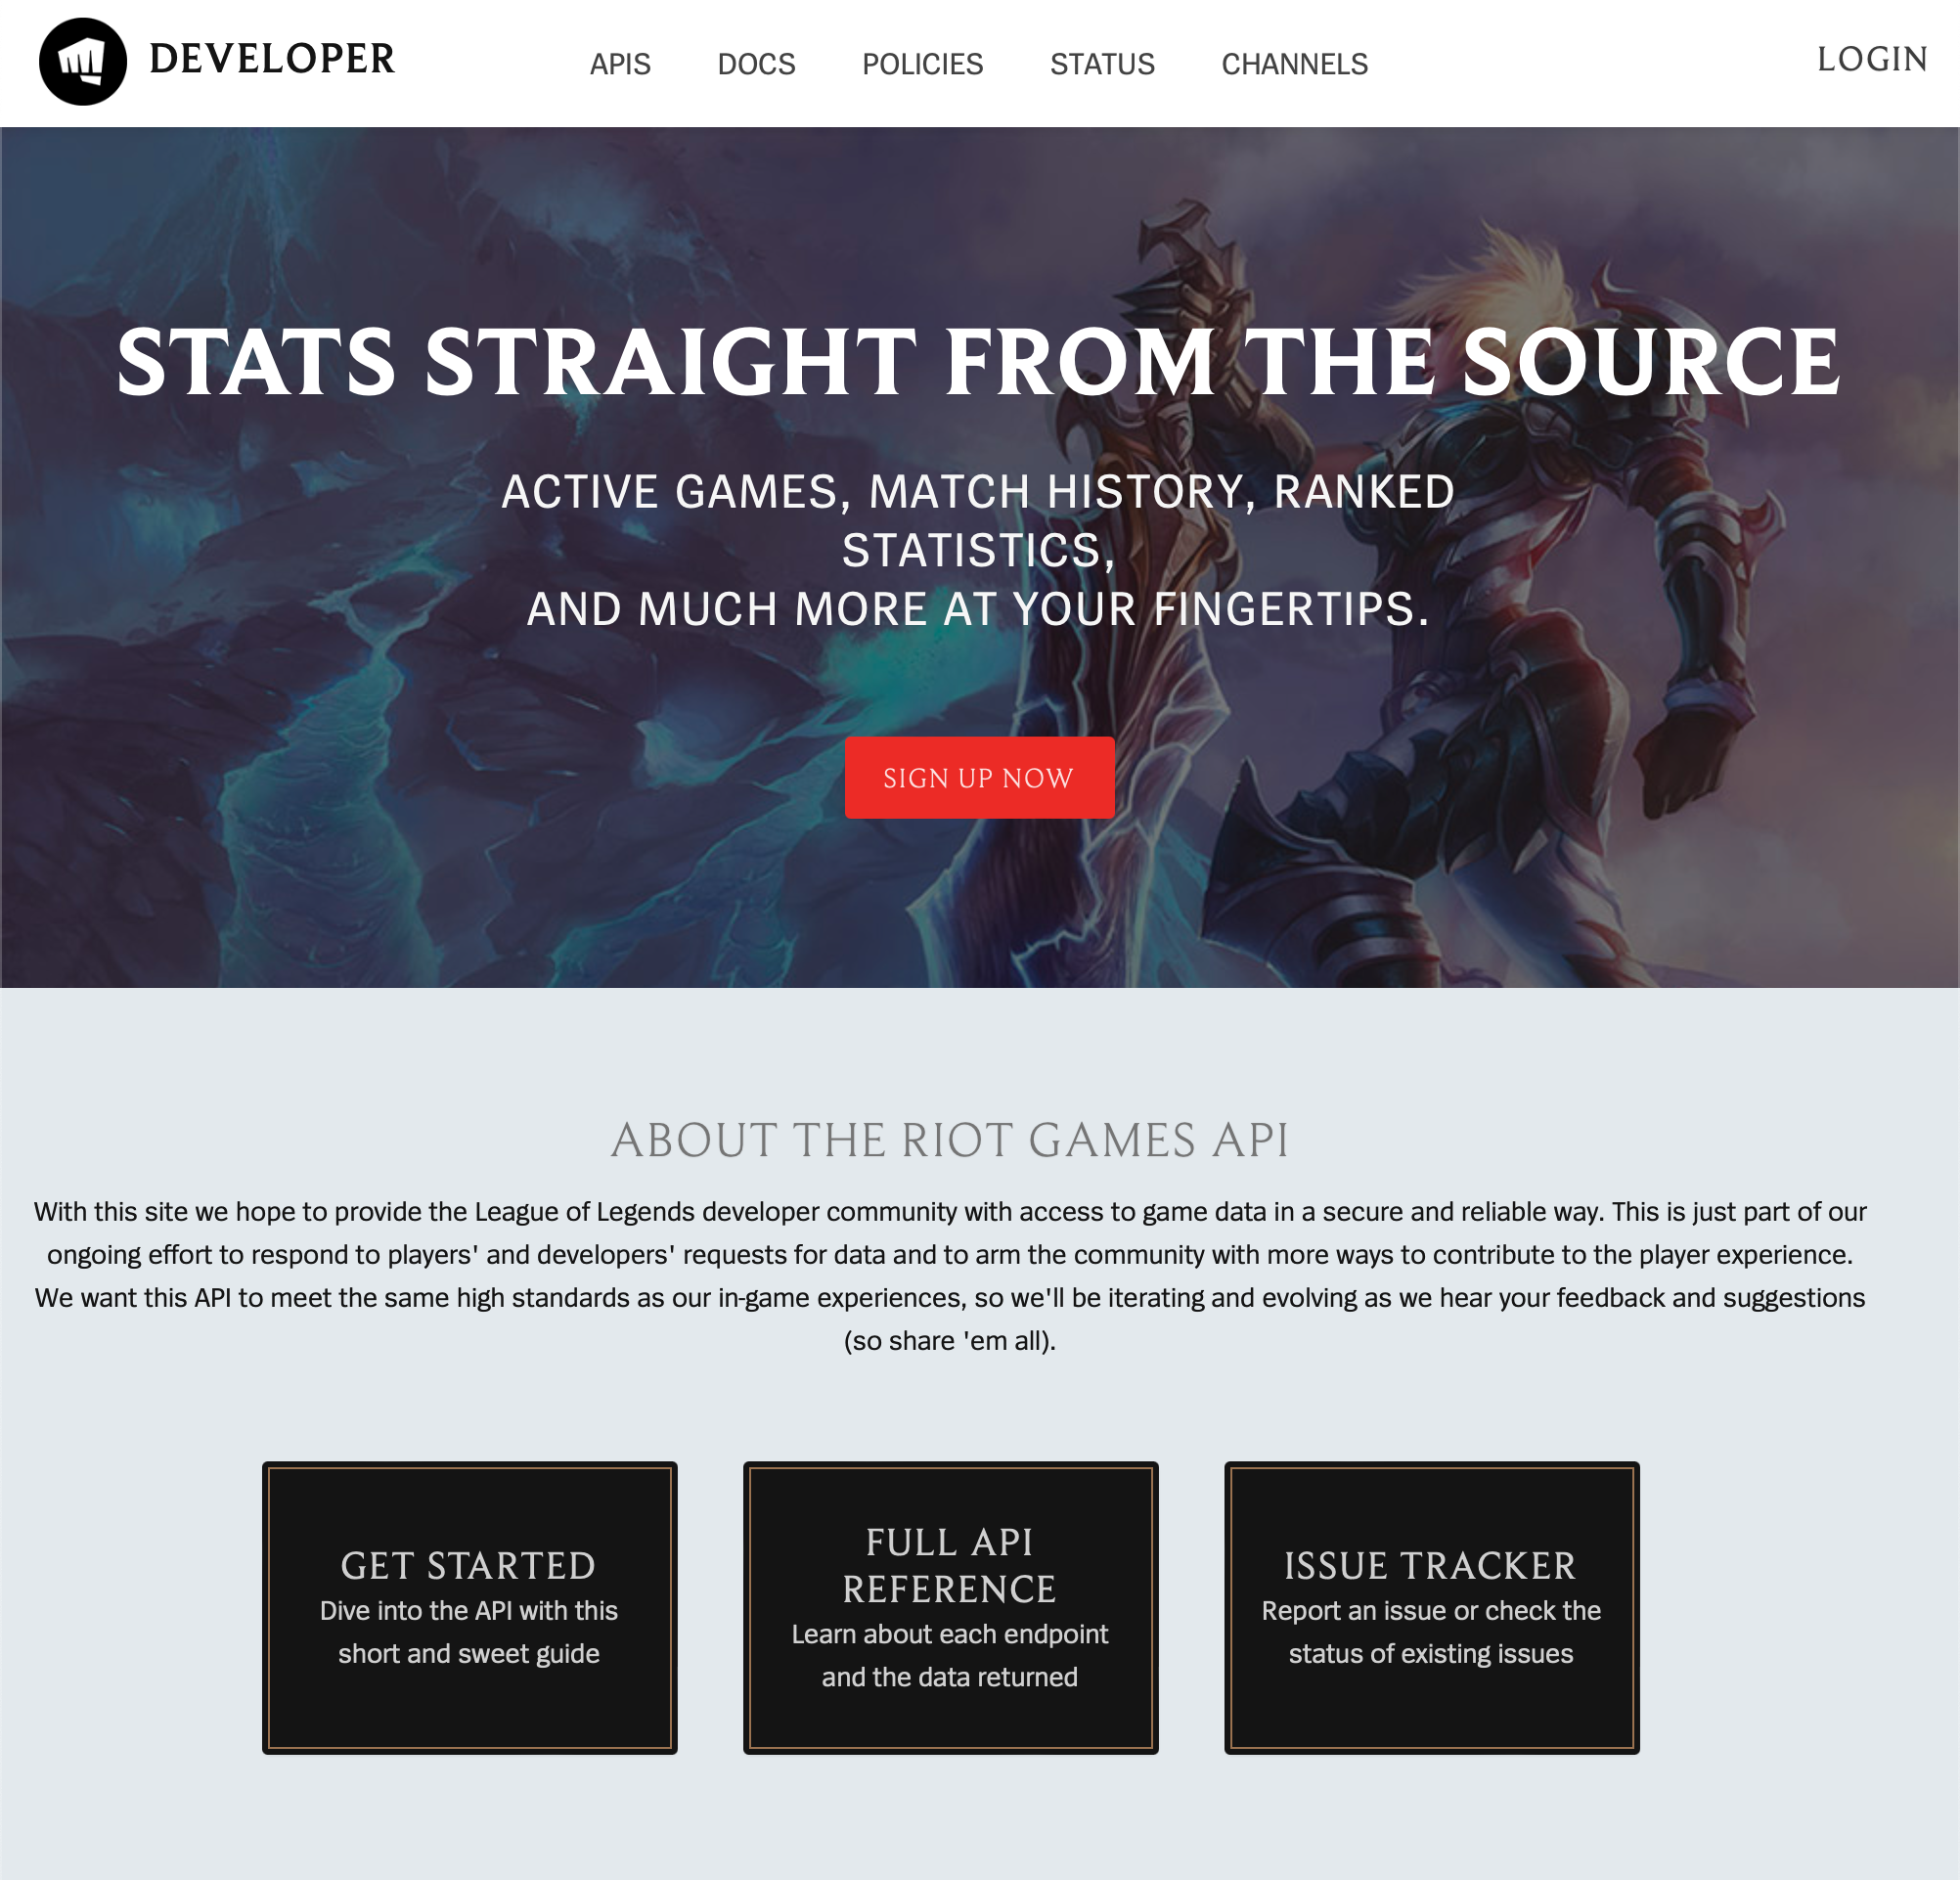

로그인을 하면 아래처럼 API KEY가 나옵니다!<p>
<font color='red'>빨간색 글씨</font>로 만료일이 나와있고<p>
RATE LIMITS이 안내 되어있습니다.<p>

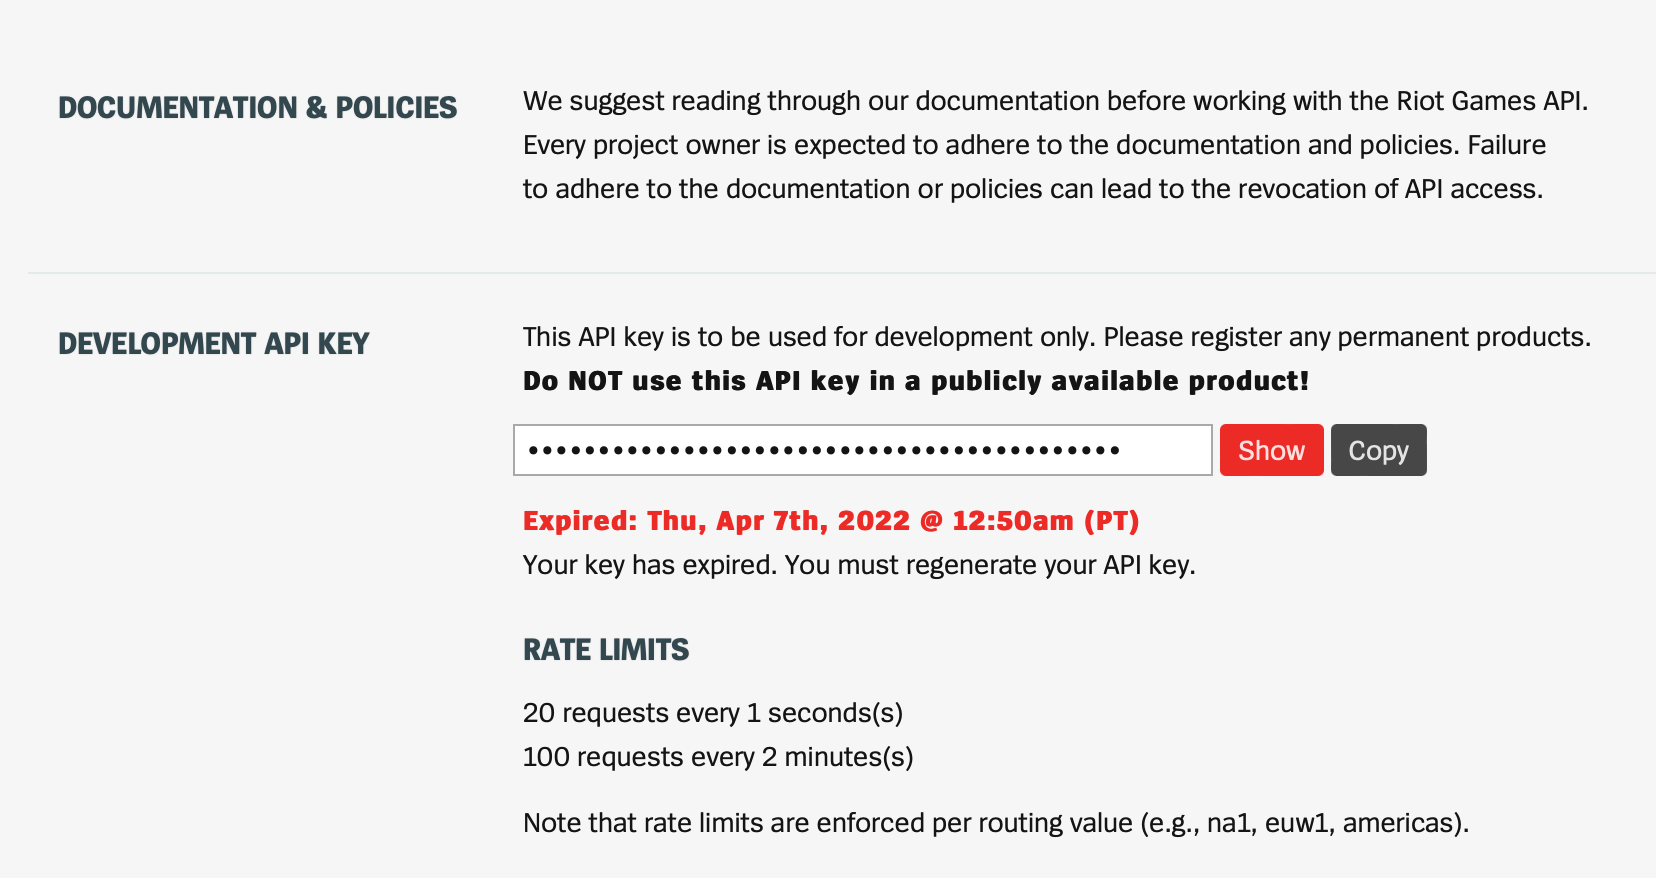

1초에 20건의 요청,<p>
2분에 100건의 요청이 가능하다고 합니다.<p>

> RATE LIMITS를 지키지 않으면 BLOCK을 당합니다.. <p>
> 경험담입니다..

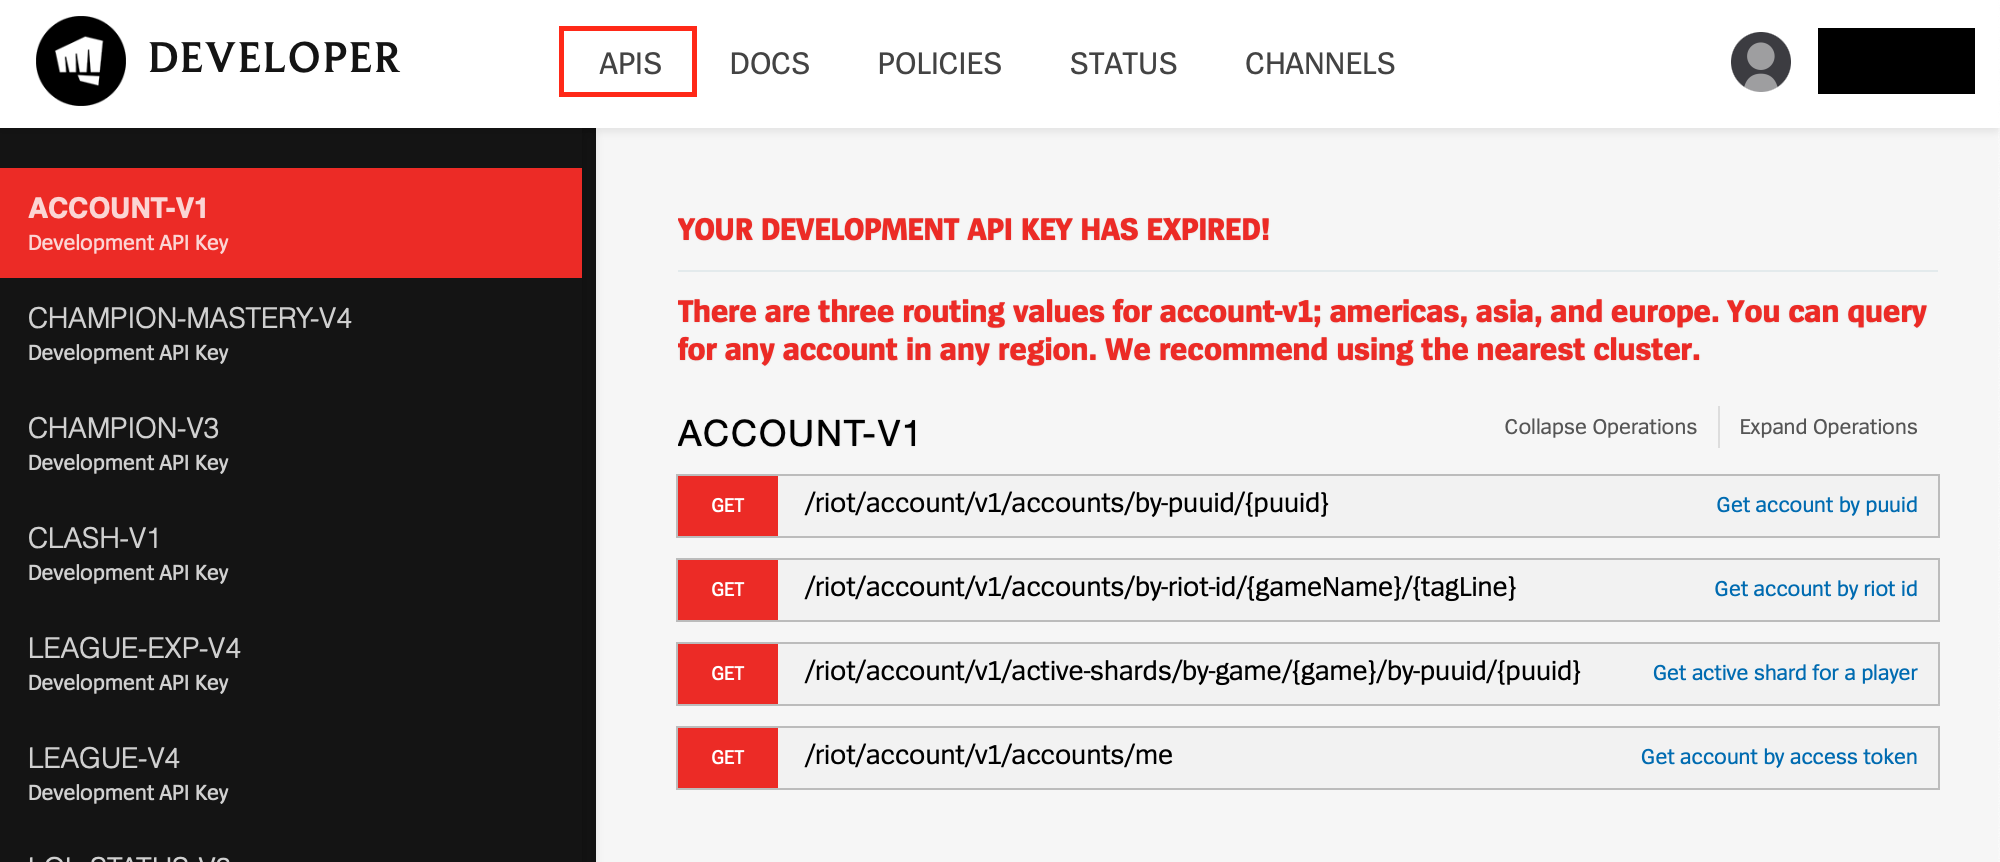

API 탭에서 데이터를 받아 볼 수 있습니다.

In [1]:
# 환경변수 불러오기
import os
from dotenv import load_dotenv

# API 요청
import requests

# 기타
import pandas as pd
from tqdm import tqdm
import time

개인 API를 사용해서 데이터를 요청 해보겠습니다.<p>
iypnb를 공유할 때 노출되지 않도록 주의하세요

[주피터노트북에서 인증키 가리는법](https://core.today/story/ZK04L54f)

In [2]:
load_dotenv()
riot_token = os.environ['riot_token']
nickname = os.environ['nickname']

<hr/>

## 데이터 요청해보기

매치기록, 매치정보 등을 보기위해<p>
먼저 계정 정보를 받겠습니다.

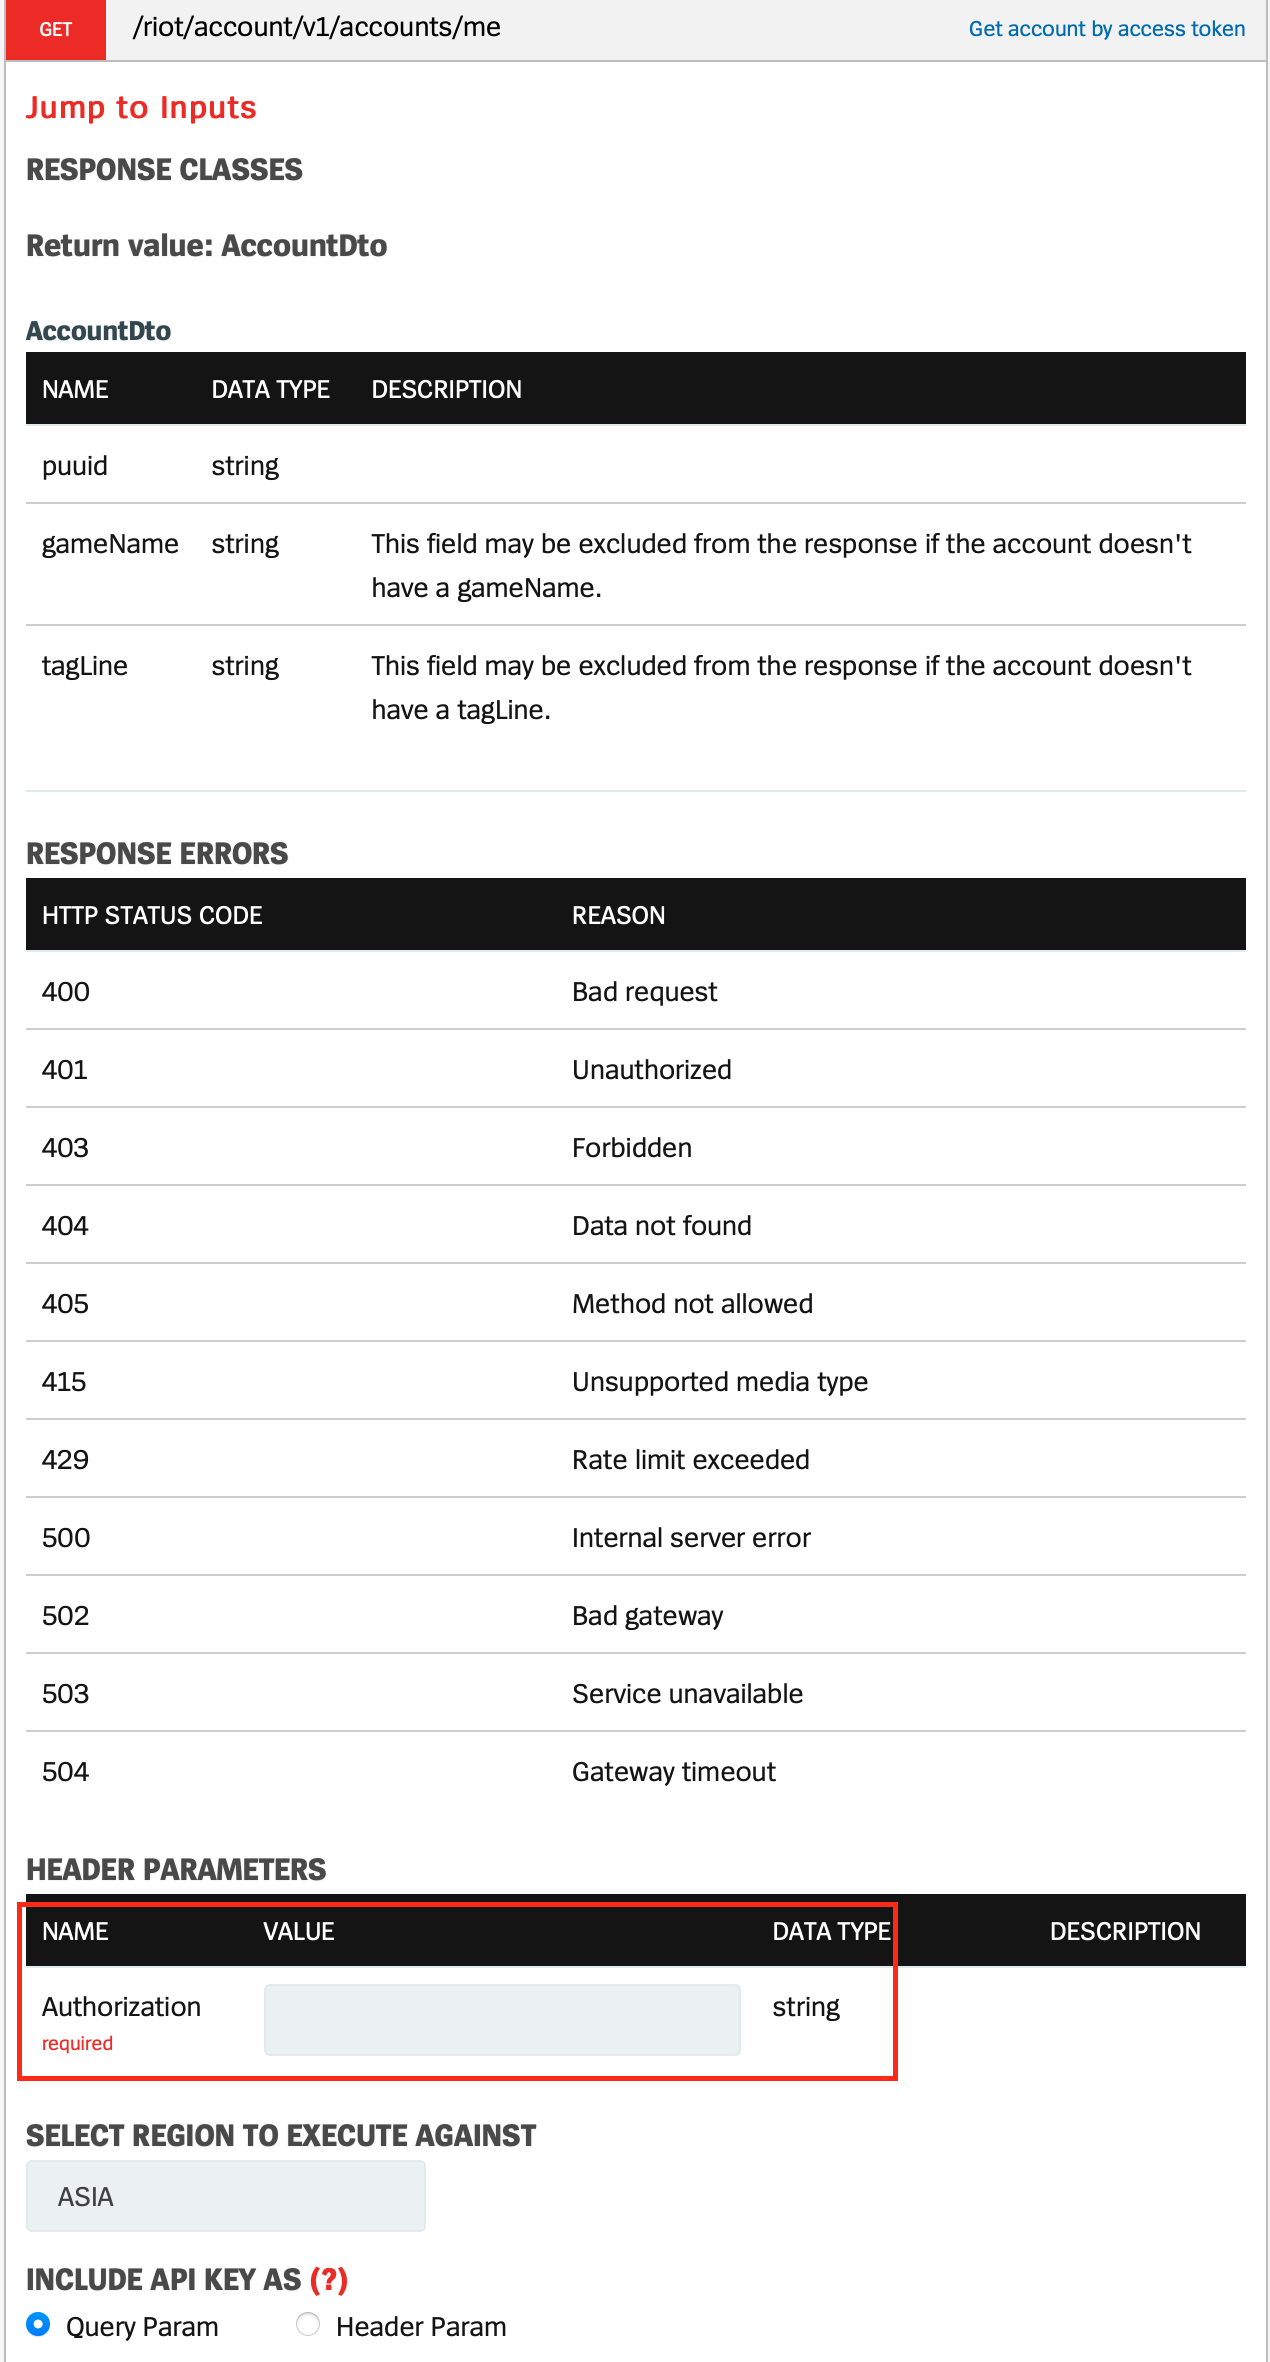

Authorization 부분에 발급받은 키를 넣고 요청을 보내보면<p>
요청 url을 알 수 있습니다.<p>
동일한 방식으로 다른 정보들에 대한 요청 url을 알아냅시다.

<br>
파이썬으로 <p>
데이터를 요청하기 위해 requests 라이브러리를 사용하겠습니다.<p>
아래의 url로 데이터를 요청하면 됩니다.<p>

```python
f'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{게임아이디}?api_key={발급받은키}'

```

참고로 게임아이디를 알면 다른사람의 데이터도 받을 수 있습니다.<p>
~~hide on bush 페이커도 가능~~

In [4]:
# api요청 url
summoner_info_request_url = f'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{nickname}?api_key={riot_token}'

summoner_data = requests.get(summoner_info_request_url)

RIOT으로부터 받은 json형식의 데이터는 다음의 키 값을 가지고 있습니다.<p>

> id : 지역별로 고유한 소환사 ID입니다.<p>
> puuid : globally 하게 고유한 ID입니다.<p>
> name : 게임 아이디입니다.<p>
> summonerLevel : 소환사의 게임 레벨입니다.

In [8]:
summoner_data.json()

{'id': 'A0hjP4jbdiHRSg3_jzxaQVyCrhGTPj9ofCXMCjK7zlJ_oHk',
 'accountId': 'H_8HER-MFnSVkx-uF-G_pmYwVzucWJeglcPJUPz-DtuLyZc',
 'puuid': 'X3nL0Hm8YtQVptZiKb_sEszk4N22OlJPSODZqLfPDvo81L-ue5MGBYaGJaEuwjLb-T-lYhaodh5_Sg',
 'name': '동주루륵',
 'profileIconId': 23,
 'revisionDate': 1649064002000,
 'summonerLevel': 120}

In [7]:
summoner_data.json().keys()

dict_keys(['id', 'accountId', 'puuid', 'name', 'profileIconId', 'revisionDate', 'summonerLevel'])

[aip 설명](http://fivelinklab.com/lolTap/guide/summoner-v4)에서 다른 키 값의 의미를 볼 수 있습니다.

<br>
이상으로 RIOT API를 사용해서 <p>
데이터를 받아봤습니다.<p>
읽어주셔서 감사합니다.